![example](images/director_shot.jpeg)

# A genre study - or - most pupolar and most profitable

**Author:** Maria Kuzmin
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

In this analysis I am trying to study which ones are the movie genres that are most profitable, and which I would recommend focusing on in creating a new movie studio.
I decided to do so because in reading articles about most profitable movies [add quote] I had the impression that certain genres tend to be more profitable than others, and therefore I wanted to investigate if this was true or not, if the numbers would confirm it.
The question that I would like to answer are:
- What movie genres have the highest gross income?
- Which ones have the lowest budgets?
- Which ones provide the highest Retun on Investment?

And once the top genres are clear:
- What makes a movie profitable?
- What are the parameters that we can choose to try to increase our ROI?

And finally: 
- How much can we expect to produce as an income on average, and how much would we need to invest in the production budget?

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
The data that was provided for this study consists of some tabular files (csv and tsv formats) that were taken by a few websites. Most of them have informations about the movie budget, gross income (domestic and worldwide), number of reviews and average reviews, movie genre and so on.
Another set of data we have is contained in a database (format SQL) that we can extract information from.
Beside the basic information that also the other websites provide, this database contains also the names of directors and writers for the movies, and a list of the people that each movie is known for.

***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let us start by taking a look at the files that we are going to use, creating DataFrames for them and getting a preview.

## TMDB
**The movie Database**

In [2]:
df_tmdb=pd.read_csv('zippedData/tmdb.movies.csv.gz')
df_tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## The Numbers
**Movie budgets**

In [3]:
df_tn=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## IMDB
This is actually a SQL database so I need to first unzip it and then I can start to query with sqlite3

In [4]:
#unzipping the file
import zipfile
with zipfile.ZipFile('zippedData/im.db.zip', 'r') as zip_ref:
    zip_ref.extractall('zippedData')

In [5]:
import sqlite3

Creating a connection and starting to look at the schema to get a sense of which are the tables in this database:

In [6]:
conn=sqlite3.connect("zippedData/im.db")
schema_df=pd.read_sql("""
SELECT *
FROM sqlite_master
;
""",conn)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now I'm going to create a Dataframe for each table that I am going to use

In [7]:
df_IMDB_moviebasics=pd.read_sql("""
SELECT *
FROM movie_basics
;
""",conn)
#df_IMDB_moviebasics
df_IMDB_moviebasics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [8]:
df_IMDB_ratings=pd.read_sql("""
SELECT *
FROM movie_ratings
;
""",conn)
df_IMDB_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [9]:
knownfor_df=pd.read_sql("""
SELECT *
FROM movie_basics
JOIN known_for
    USING (movie_id)
;
""",conn)

In [10]:
persons_df=pd.read_sql("""
SELECT *
FROM persons
;
""",conn)

## Data Preparation
Describe and justify the process for analyzing or modeling the data.

There were a few steps included in the process of preparing this data.
First I had to convert the type of some of the data, that represented numbers but was in the format of strings.
Secondly in order to identify the genre of the movies I had to split the string that described the genre and conevrt that into a list, to be able to use the .explode() method to separate the movies that have different genres.
I deleted the missing values that were present since there were only 8 movies without a genre and compared to the nuber of entries I have the NaN values seemed negligible.
I decided not to remove the outliers yet, since there is something that we can learn from the movie with higest income or lowest budget.
I did decide to remove them for the last step of the analysis, when calculating the averages of budget and gross.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

I am going to conduct a study about the movies gross and production budget, and I will do so by working on the dataframe from "The Numbers". I will need to subtract the budget from the gross, but I need to make sure that the values are of float type to do that.

In [11]:
type(df_tn['domestic_gross'][0])

str

In [12]:
type(df_tn['production_budget'][0])

str

Since the types of the columns that I need to compute are strings I need to first convert them to floats.

In [13]:
# First removing the dollar sign
df_tn['domestic_gross']=df_tn['domestic_gross'].str.strip('$')
df_tn['production_budget']=df_tn['production_budget'].str.strip('$')
df_tn['worldwide_gross']=df_tn['worldwide_gross'].str.strip('$');


In [14]:
# Replacing the , which make it impossible to convert to float
df_tn['domestic_gross']=(df_tn['domestic_gross']).str.replace(",","")
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).str.replace(",","")
df_tn['production_budget']=(df_tn['production_budget']).str.replace(",","")

In [15]:
#Finally converting to float
df_tn['domestic_gross']=df_tn['domestic_gross'].apply(float)
df_tn['worldwide_gross']=(df_tn['worldwide_gross']).apply(float)
df_tn['production_budget']=(df_tn['production_budget']).apply(float)

Now that I converted to floats I can calculate the domestic and worldwide net, subtracting the budget from the incomes.

In [16]:
df_tn['domestic_net']=df_tn['domestic_gross']-df_tn['production_budget']
df_tn['worldwide_net']=df_tn['worldwide_gross']-df_tn['production_budget']

In [17]:
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,303181382.0,9.997217e+08


Now getting my IMDB Dataframe with movie basics and ratings, since I want to study the genre and the reviews.

In [18]:
df_IMDB=pd.read_sql("""
SELECT movie_id, primary_title, genres, averagerating, numvotes
FROM movie_basics
JOIN movie_ratings
    USING (movie_id)
;
""",conn)
df_IMDB.head()

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119


Next I want to merge the two dataframes, to do so I need to rename the columns

In [19]:
df_IMDB=df_IMDB.rename(columns={'primary_title':'movie'})

In [20]:
main_df=pd.merge(df_tn, df_IMDB,on='movie',how='inner')
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,"Action,Adventure,Fantasy",6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,tt6565702,"Action,Adventure,Sci-Fi",6.0,24451
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,128405868.0,1.072414e+09,tt2395427,"Action,Adventure,Sci-Fi",7.3,665594
4,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,378815482.0,1.748134e+09,tt4154756,"Action,Adventure,Sci-Fi",8.5,670926


Let us check what is the size of our final DataFrame to get a sense of how many values we are working with.

In [21]:
main_df.shape #.info()

(2875, 12)

In order to continue with my analysis I need to decide what to do with NaN values that could create problems.
First I am going to check how many there are, to then decide how to proceed with data cleaning.

In [22]:
main_df.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
domestic_net         0
worldwide_net        0
movie_id             0
genres               8
averagerating        0
numvotes             0
dtype: int64

Since there are only 8 null values given the size of the file it is appropriate to simply drop those values.

In [23]:
main_df.dropna(inplace=True);

Since I want to study the movies based on their genre let me take a look at what are the values associated with genres in this DataFrame.

In [24]:
main_df['genres'].value_counts()

Drama                      319
Documentary                126
Comedy                     108
Comedy,Drama                93
Drama,Romance               77
                          ... 
Horror,Romance,Thriller      1
Animation,Horror             1
Biography,Drama,Western      1
Drama,Thriller,Western       1
Action,Drama,Horror          1
Name: genres, Length: 311, dtype: int64

The problem we have here is that many movies have listed more then one gerne.
That makes it complicated to group by genre and draw conclusions on a specific genre because with this format "Comedy, Drama" results as ist own genre, instead of being listed as a movie that pertains to both genres.

To be able to continue in my study I am going to have to separate all those gernes, and have a new data frame in which every listed movie has only one corrsponding genre (and movies with two listed genres will appear twice etc).
The first step is to separate the string of the genre into a list with the separate genres, and I do this by creating a function:

In [25]:
def Convert(string):
    li = list(string.split(","))
    return li

And then applying that function to the genre column of the dataframe

In [26]:
main_df['genres']=main_df['genres'].map(Convert)

In [27]:
type(main_df['genres'][1])

list

Now I can use the pandas' method `.explode( )` that can separate the different entries for "genre" for a single movie, by creating copies of the same row each with a single genre.

In [28]:
main_df=main_df.explode('genres')

In [29]:
main_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,335507625.0,2.351345e+09,tt1775309,Horror,6.1,43
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Action,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Adventure,6.6,447624
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,-169536125.0,6.350639e+08,tt1298650,Fantasy,6.6,447624
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,-307237650.0,-2.002376e+08,tt6565702,Action,6.0,24451


And now I have my dataframe ready to work with!

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

With my DataFrame of movies divided by genre I grouped the movies by genre and calculated the average of the numerical values per genre.
In this way I was able to study what on averge is the gross income (both worldwide and domestic) per genre, what is the budget per genre and some other similar calculations.
Then I selected what I found to be the five genres with highest gross income and highest ROI.
Starting from these five genres, I calculated how many people each movie was known for, and calculated to see if there is a correlation between the number of famous people in a movie and the gross income and production budget.
I also divided the movies by release date to study which are the release months that tend to have highest gross, and which ones have the lowest budgets.
Finally going back to the main database I calculated what is the gross income and budget on average, both considering all the movies from all the genres, and only movies from the five top genres.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

Now I need to study... Lets start from gross income vs genre

In [30]:
# Here you run your code to model the data
average_df=main_df.groupby('genres').mean()
average_df.head()

,id,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,averagerating,numvotes
genres,,,,,,,,
Action,49.833333,6.472846e+07,7.093171e+07,1.904540e+08,6.203254e+06,1.257256e+08,6.103810,135457.123810
Adventure,49.015625,9.131197e+07,1.070627e+08,2.999950e+08,1.575069e+07,2.086830e+08,6.400893,168058.022321
Animation,46.846154,8.590607e+07,1.158421e+08,3.176463e+08,2.993601e+07,2.317402e+08,6.482308,99923.807692
Biography,52.215385,2.545666e+07,3.469678e+07,7.231284e+07,9.240125e+06,4.685618e+07,6.971795,80511.994872
Comedy,51.269129,3.342504e+07,4.760250e+07,1.061395e+08,1.417746e+07,7.271444e+07,6.186280,66854.522427


In [31]:
plt.style.use('seaborn-darkgrid')
plt.style.use('seaborn-talk')
sns.color_palette("flare", as_cmap=True)

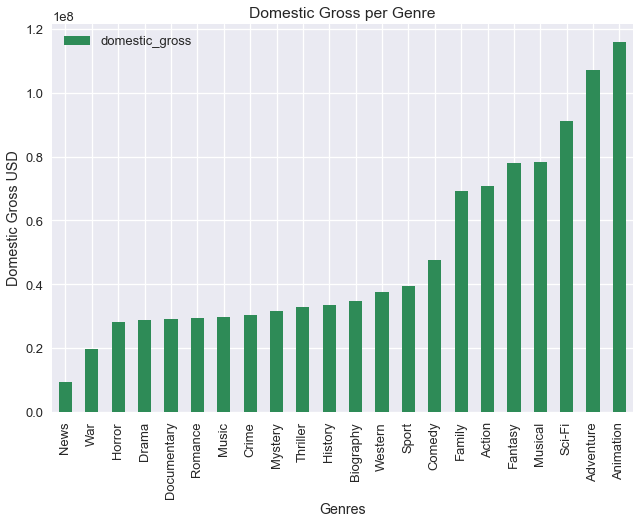

In [32]:
average_df=average_df.sort_values(by=['domestic_gross'])
average_df.plot.bar(y='domestic_gross',color='#2E8B57',title='Domestic Gross per Genre'\
                    , ylabel='Domestic Gross USD', xlabel='Genres');

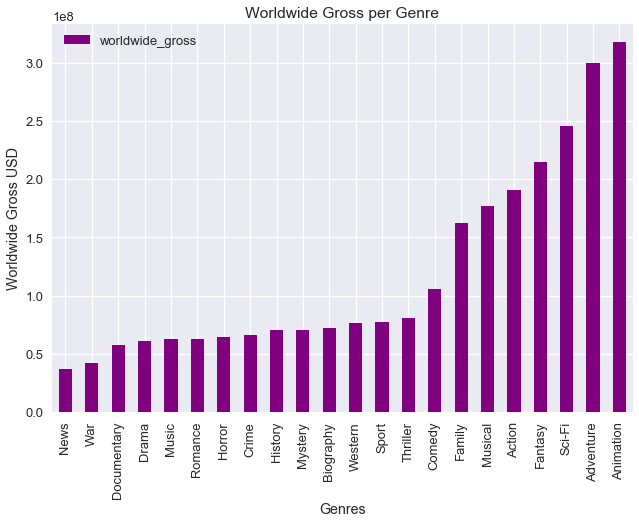

In [33]:
average_df=average_df.sort_values(by=['worldwide_gross'])
average_df.plot.bar(y='worldwide_gross',color='#800080', title='Worldwide Gross per Genre'\
                    , ylabel='Worldwide Gross USD',xlabel='Genres');
plt.savefig('WWgrossgnr.png')

The five genres with the highest average worldwide gross are Animation, Adventure, Sci-Fi, Fantasy and Action.

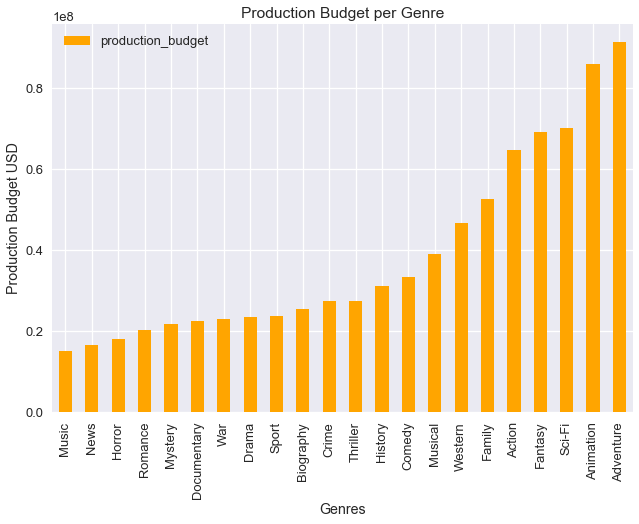

In [34]:
average_df=average_df.sort_values(by=['production_budget'])
average_df.plot.bar(y='production_budget',color='#FFA500',title='Production Budget per Genre', \
                    ylabel='Production Budget USD',xlabel='Genres');

In [35]:
plt.style.use('seaborn-notebook')

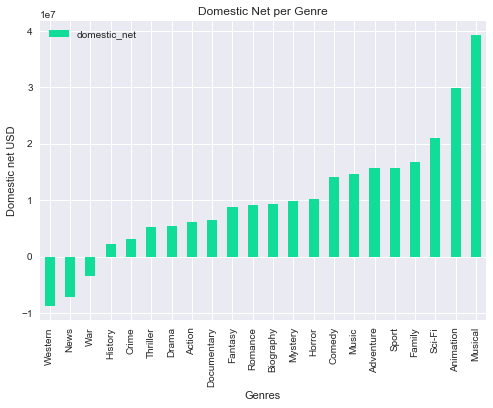

In [36]:
average_df=average_df.sort_values(by=['domestic_net'])
average_df.plot.bar(y='domestic_net',color='#11dd99', title='Domestic Net per Genre', \
                    ylabel='Domestic net USD', xlabel='Genres');

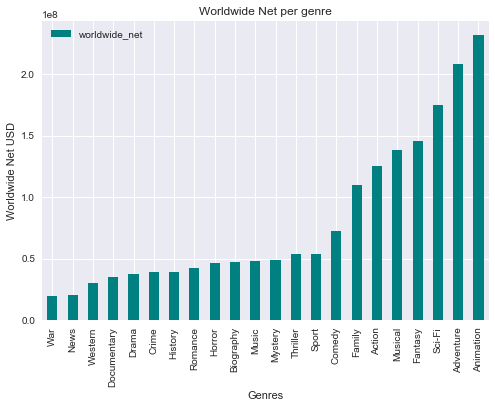

In [37]:
average_df=average_df.sort_values(by=['worldwide_net'])
average_df.plot.bar(y='worldwide_net',color='teal', title='Worldwide Net per genre',\
                    ylabel='Worldwide Net USD', xlabel='Genres');

### ROI
Which is a performance measure to evaluate the efficiency or profitability of an investment.
It is generally calculated as net income versus investment.

In [38]:
average_df['ROI']=(average_df['worldwide_gross']-average_df['production_budget'])\
                    /average_df['production_budget']
roi_df=average_df.sort_values(by='ROI')

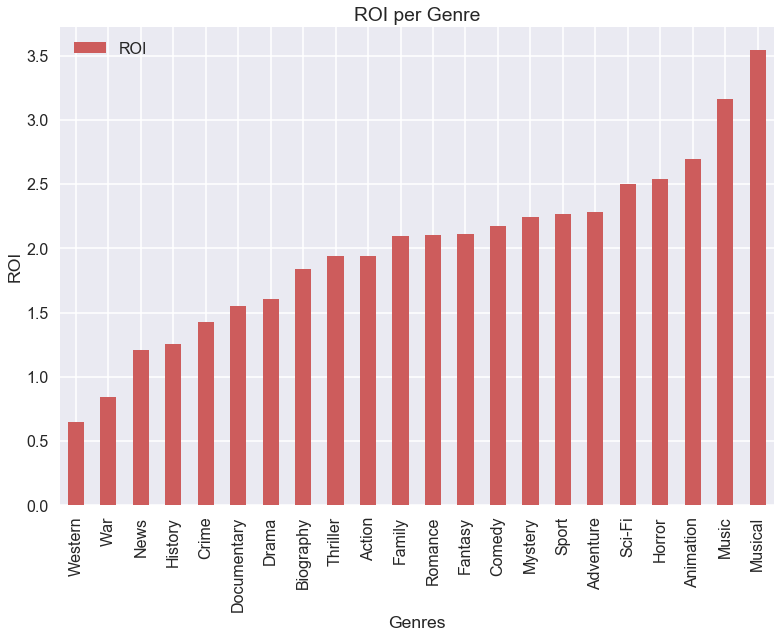

In [39]:
plt.style.use('seaborn-poster')
roi_df.plot.bar(y='ROI',color='#CD5C5C', title="ROI per Genre", ylabel="ROI", xlabel='Genres');

We discovered that the top five genres with higest return on investment are Musical, Animation, Horror, Sci-Fi and Adventure.
Let us make a smaller DataFrame only with these five categories to be able to analize these genres a little more in depth.

In [40]:
animation_df=main_df.loc[main_df['genres']=='Animation']
adventure_df=main_df.loc[main_df['genres']=='Adventure']
scifi_df=main_df.loc[main_df['genres']=='Sci-Fi']
musical_df=main_df.loc[main_df['genres']=='Musical']+main_df.loc[main_df['genres']=='Music']
horror_df=main_df.loc[main_df['genres']=='Horror']

In [41]:
top5_list=[animation_df,adventure_df, scifi_df, musical_df,horror_df]
top5_df=pd.concat(top5_list)

In [42]:
top5_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,domestic_net,worldwide_net,movie_id,genres,averagerating,numvotes
11,15.0,"Nov 24, 2010",Tangled,260000000.0,200821936.0,5.864772e+08,-59178064.0,3.264772e+08,tt0398286,Animation,7.8,366366.0
38,44.0,"Jun 15, 2018",Incredibles 2,200000000.0,608581744.0,1.242521e+09,408581744.0,1.042521e+09,tt3606756,Animation,7.7,203510.0
40,46.0,"Jun 17, 2016",Finding Dory,200000000.0,486295561.0,1.021215e+09,286295561.0,8.212152e+08,tt2277860,Animation,7.3,213542.0
41,47.0,"Jun 18, 2010",Toy Story 3,200000000.0,415004880.0,1.068880e+09,215004880.0,8.688795e+08,tt0435761,Animation,8.3,682218.0
48,53.0,"Jun 21, 2013",Monsters University,200000000.0,268488329.0,7.435883e+08,68488329.0,5.435883e+08,tt1453405,Animation,7.3,291887.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2864,51.0,"Apr 21, 2015",Ten,25000.0,0.0,0.000000e+00,-25000.0,-2.500000e+04,tt2496400,Horror,5.4,623.0
2865,51.0,"Apr 21, 2015",Ten,25000.0,0.0,0.000000e+00,-25000.0,-2.500000e+04,tt6415838,Horror,4.7,191.0
2869,59.0,"Nov 25, 2011",The Ridges,17300.0,0.0,0.000000e+00,-17300.0,-1.730000e+04,tt1781935,Horror,2.9,127.0
2873,78.0,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00,-7000.0,-7.000000e+03,tt7837402,Horror,5.6,43.0


In [43]:
average_df.reset_index(inplace=True)

Let us take a look now at the relationship between gross income and production budget for these five genres:

In [44]:
plt.style.use('seaborn-talk')

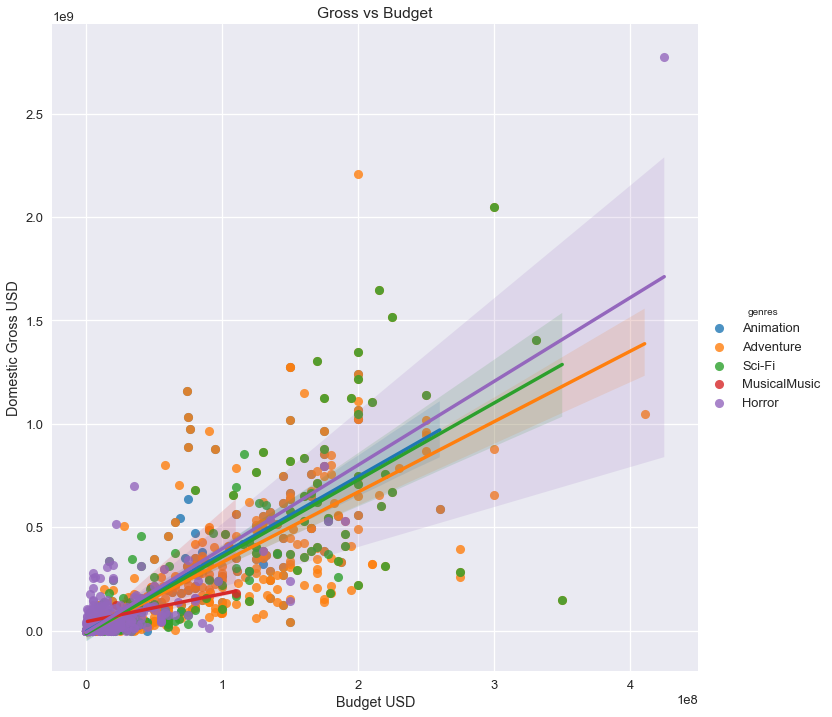

In [45]:
sns.lmplot(x="production_budget", y="worldwide_gross", hue="genres", data=top5_df,height=10, aspect=1).set\
            (title="Gross vs Budget", xlabel='Budget USD', ylabel='Domestic Gross USD');

## Now the question is: what makes a movie profitable?

Let us study other things that could be connected to a movie being profitable, like number of people that it is know for, as well as time of the year in which the movie was released. To use this we retrieve some dataframes that we created before.

### People that a movie is 'known for'

In [46]:
top5_df.drop_duplicates(subset=['movie'], inplace=True)
first_df=pd.merge(top5_df, knownfor_df, on='movie_id',how='inner')
people_df=pd.merge(first_df, persons_df, on='person_id', how='inner')
people_df=people_df.drop(columns=['production_budget', 'domestic_gross','domestic_net','worldwide_net','start_year',\
                                  'primary_title','original_title','runtime_minutes','genres_y','death_year'])
counting=people_df.groupby('movie').count() # counting number of people "known_for" in each movie
counting=counting.reset_index()
famous_counts= pd.DataFrame().assign(movie=counting['movie'],counts=counting['id'])

In [47]:
top5_fam=famous_counts.merge(top5_df,on='movie',how='inner')
top5_fam=top5_fam.sort_values(by='counts')
top5_fam.drop_duplicates(subset=['movie'], inplace=True)

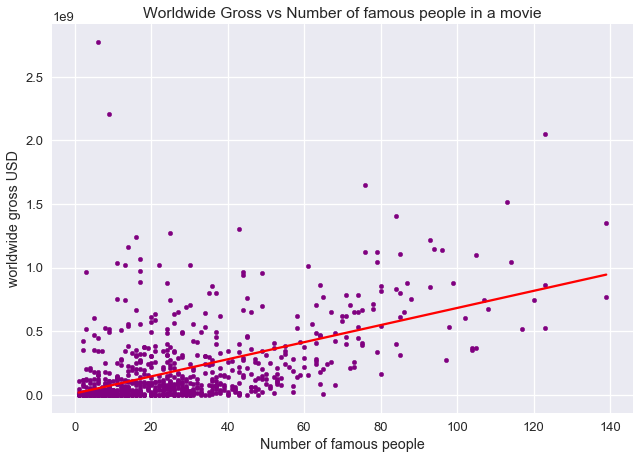

In [48]:
ax=top5_fam.plot.scatter(x='counts',y='worldwide_gross',color="#800080")
ax.set_title("Worldwide Gross vs Number of famous people in a movie")
ax.set_xlabel("Number of famous people")
ax.set_ylabel("worldwide gross USD")
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'], \
                    top5_fam['worldwide_gross'], 1))(np.unique(top5_fam['counts'])), color='red');

In [49]:
#code for correlation from https://dev.to/shanelee/how-to-plot-a-correlation-with-python-python-for-statistics-5ef

It looks like there is a correlation between number of famous people in a movie and worldwide gross income.
Here I calculated it to be able to quantify.

In [50]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['worldwide_gross'])
print('Correlation: ',correlation_matrix[0][1])

Correlation:  0.5312528583517938


The correlation is a normalized value which means that it spans between 1 and 0. I would consider a 50% correlation a pretty good one.

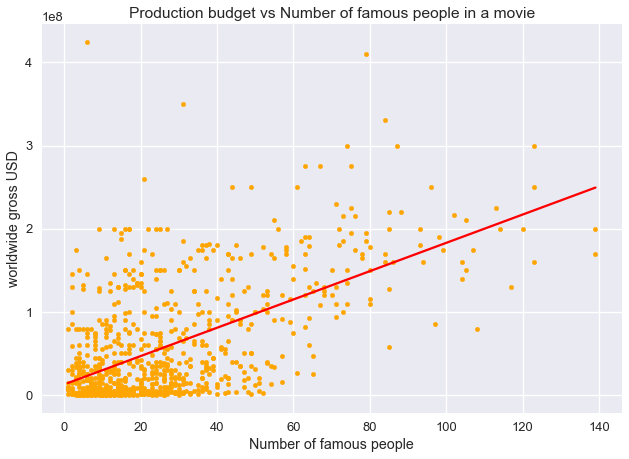

In [51]:
ax=top5_fam.plot.scatter(x='counts',y='production_budget',color='#FFA500')
ax.set_title("Production budget vs Number of famous people in a movie")
ax.set_xlabel("Number of famous people")
ax.set_ylabel("worldwide gross USD")
plt.plot(np.unique(top5_fam['counts']), np.poly1d(np.polyfit(top5_fam['counts'],\
                    top5_fam['production_budget'], 1))(np.unique(top5_fam['counts'])), color='red');

There is also a correlation between number of famous people in a movie and budget, let's see how much it is exactly:

In [52]:
correlation_matrix = np.corrcoef(top5_fam['counts'], top5_fam['production_budget'])
print('Correlation: ',correlation_matrix[0][1])

Correlation:  0.5911834487384903


Also the correlation between budget and number of people is positive and around 50%, it is to be expected...

### When to release
One more factor that I would like to investigate is when is the best time of the year to release a movie, as one more element that can be taken into account in trying to produce the most profitable movies.

The only file that contains the release date is the one from The Movie Database so I'm going to pull that one up and merge it with the file from The Numbers:

In [53]:
release_df=pd.merge(df_tn,df_tmdb,left_on='movie',right_on='title',how='inner')
release_df.drop(columns=['Unnamed: 0','genre_ids','id_y','original_language','release_date_y','title'],inplace=True)

In [54]:
""" This method returns the months in numbers. """
release_df['month'] = pd.DatetimeIndex(release_df['release_date_x']).month # 
release_df=release_df.groupby('month').mean()
release_df.reset_index(inplace=True)
release_df.sort_values(by='month',inplace=True)
import calendar
""" I can apply this to turn the months from numbers into abbreviations on the 
month names which is better for the graph. """
release_df['month'] = release_df['month'].apply(lambda x: calendar.month_abbr[x])

#code adapted from EoinS https://stackoverflow.com/questions/37625334/python-pandas-convert-month-int-to-month-name

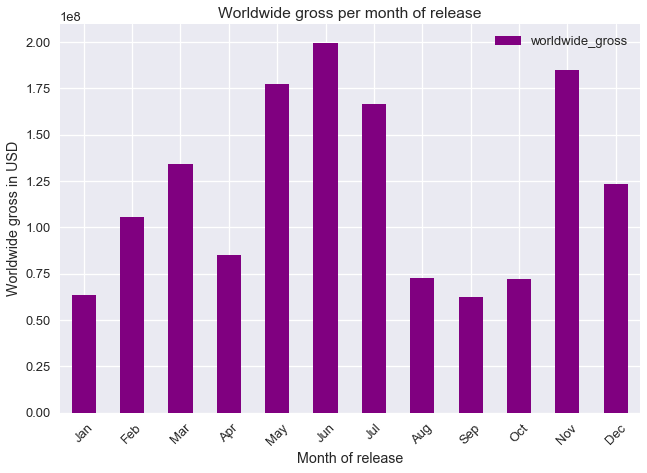

In [55]:
release_df.plot.bar(x='month',y='worldwide_gross',color='#800080',rot=45, xlabel='Month of release',\
                    ylabel='Worldwide gross in USD', title='Worldwide gross per month of release');

/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/vi/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


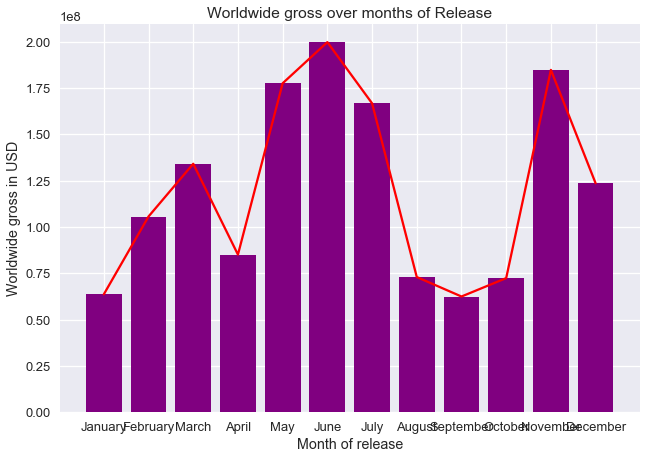

In [56]:
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
fig,ax=plt.subplots()
ax.bar(release_df['month'], release_df['worldwide_gross'],color='#800080')
ax.plot(release_df['month'], release_df['worldwide_gross'],color='red')
ax.set_title('Worldwide gross over months of Release')
ax.set_xlabel('Month of release')
ax.set_ylabel('Worldwide gross in USD')
ax.set_xticklabels(labels);

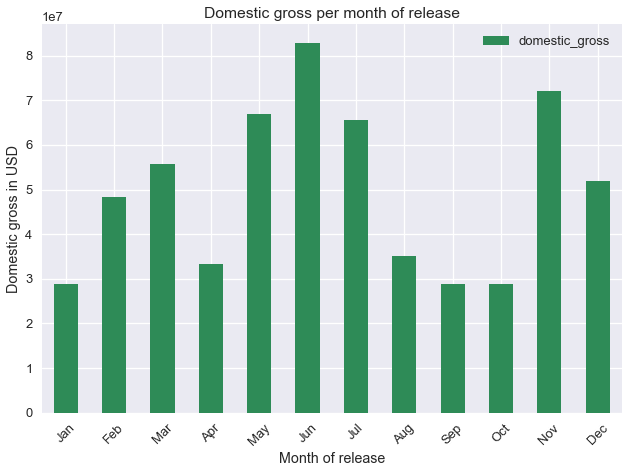

In [57]:
release_df.plot.bar(x='month',y='domestic_gross',color='#2E8B57',rot=45, xlabel='Month of release',\
                    ylabel='Domestic gross in USD', title='Domestic gross per month of release');

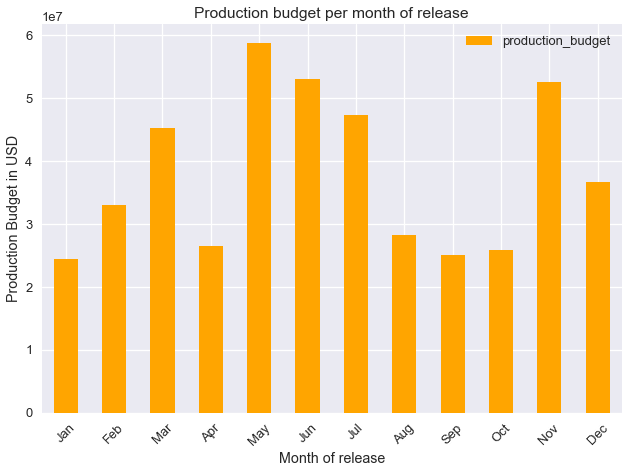

In [58]:
release_df.plot.bar(x='month',y='production_budget',color='#FFA500',rot=45, xlabel='Month of release',\
                    ylabel='Production Budget in USD', title='Production budget per month of release');

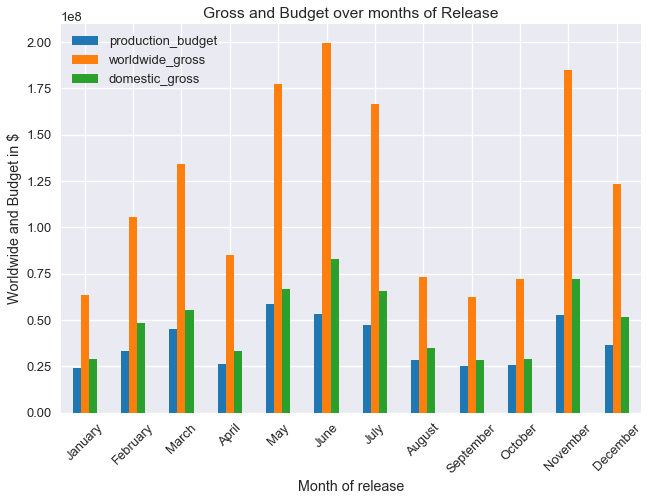

In [59]:
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
df=pd.DataFrame({'production_budget': release_df['production_budget'],
                 'worldwide_gross': release_df['worldwide_gross'],\
                 'domestic_gross':release_df['domestic_gross']
                }, index=release_df['month'].index)
ax=df.plot.bar(rot=45)
ax.set_title('Gross and Budget over months of Release')
ax.set_xlabel('Month of release')
ax.set_ylabel('Worldwide and Budget in $')
ax.set_xticklabels(labels);

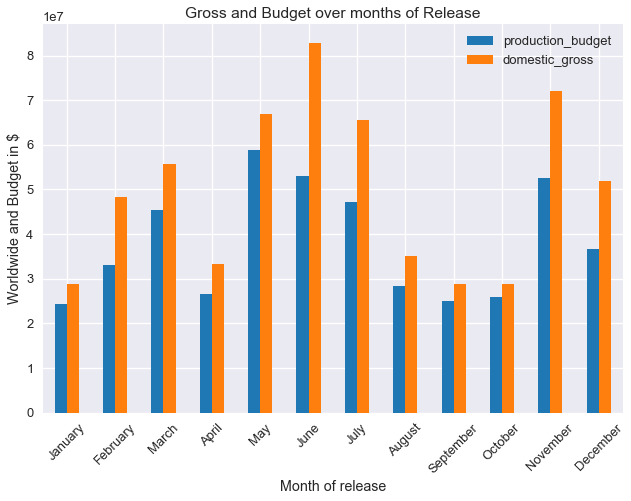

In [60]:
labels=['January','February','March','April','May','June','July','August','September','October','November','December']
df=pd.DataFrame({'production_budget': release_df['production_budget'],
#                 'worldwide_gross': release_df['worldwide_gross'],\
                 'domestic_gross':release_df['domestic_gross']
                }, index=release_df['month'].index)
ax=df.plot.bar(rot=45)
ax.set_title('Gross and Budget over months of Release')
ax.set_xlabel('Month of release')
ax.set_ylabel('Worldwide and Budget in $')
ax.set_xticklabels(labels);

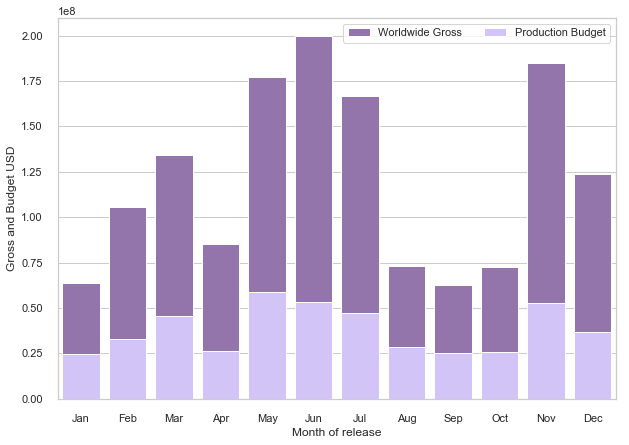

In [65]:
sns.set_theme(style='whitegrid')
f,ax = plt.subplots(figsize=(10,7))

sns.set_color_codes("muted")
sns.barplot(x="month", y="worldwide_gross", data=release_df,
            label="Worldwide Gross", color="m")

sns.set_color_codes("pastel")
sns.barplot(x="month", y="production_budget", data=release_df,
            label="Production Budget", color="m")

ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(ylabel="Gross and Budget USD",
       xlabel="Month of release");


We observe that the seasons in which the profit is the highest are the summer and the fall.
In patricular the months in which the gross income is highest are June and November.
This trend is followed also by the budgets, as we can observe lower budget movies are usually being release during the lowest profit months. It is logical to wait for the highest profit months to release a blockbuster movie, instead of risking a lower return by releasing it during months in which people don't go to the movies as much...

### A few numbers to keep in mind...

Let us do one final calculation to see what we can expect on average about domestic gross, worldwide gross and production budget across all the movies and only in our top 5 genres.
First let us drop the outliers that would influence heavily our calculations, from both Dataframes.

In [62]:
"""Removing outliers in the main database """
Q3=np.percentile(main_df['production_budget'],75)
Q1=np.percentile(main_df['production_budget'],25)
IQR=main_df
IQR.drop(IQR.index[IQR['production_budget']>Q3], inplace=True)
IQR.drop(IQR.index[IQR['production_budget']<Q1], inplace=True)

In [63]:
"""Re running the definition of top5_df since it was drawing the data from main_df"""
animation_df=main_df.loc[main_df['genres']=='Animation']
adventure_df=main_df.loc[main_df['genres']=='Adventure']
scifi_df=main_df.loc[main_df['genres']=='Sci-Fi']
musical_df=main_df.loc[main_df['genres']=='Musical']+main_df.loc[main_df['genres']=='Music']
horror_df=main_df.loc[main_df['genres']=='Horror']
top5_list=[animation_df,adventure_df, scifi_df, musical_df,horror_df]
top5_df=pd.concat(top5_list)

Now I can calculate the values that I was looking for:

In [64]:
main_budget=main_df['production_budget'].mean()/1000000
top5_budget=top5_df['production_budget'].mean()/1000000
main_worldgross=main_df['worldwide_gross'].mean()/100000
top5_worldgross=top5_df['worldwide_gross'].mean()/100000
main_domgross=main_df['domestic_gross'].mean()/100000
top5_domgross=top5_df['domestic_gross'].mean()/100000
print("The average budget that we can expect is:\n",\
      main_budget,"in millions of USD \n while the budget for a movie from our top five genres is:\n",top5_budget,\
     "in millions of USD\n")
print("The average worldwide gross that we can expect is:\n",\
      main_worldgross,"in millions of USD \n while the worldwide gross for a movie from our top five genres is:\n",\
      top5_worldgross,"in millions of USD\n")
print("The average domestic gross that we can expect is:\n",\
      main_domgross,"in millions of USD \n while the domestic gross for a movie from our top five genres is:\n"\
      ,top5_domgross,"in millions of USD\n")


The average budget that we can expect is:
 20.20581605839416 in millions of USD 
 while the budget for a movie from our top five genres is:
 20.668666666666667 in millions of USD

The average worldwide gross that we can expect is:
 565.9940884408759 in millions of USD 
 while the worldwide gross for a movie from our top five genres is:
 614.5385695476191 in millions of USD

The average domestic gross that we can expect is:
 296.5978865021898 in millions of USD 
 while the domestic gross for a movie from our top five genres is:
 305.53443664285714 in millions of USD



Considering these numbers I would strongly recommend producing movies from the five genres that we identified, considering thta they have an overall lower budget compared to the average, and yet they have higher values for both worldwide gross and domestic gross .

## Evaluation
Evaluate how well your work solves the stated business problem.

I think that by looking at the data is clear that there isn't a standard recipe to produce a very profitable movie, there are many factors at play and ultimately even investing in a higher budget movie does not guarantee a proportional results in gross profit.
But this said, I think that the five genres that I identified tend to be the most watched and most loved movies, therefore they tend to give a better return on investment overall.
The presence of famous people in the movie tends to increase the chances of a higher income, but is not a guarantee.
The time of release seems to be very consistent to me, and should be taken in account when deciding at what time to release a movie, based on the return that is expected and the investment made on it.
The data shows that on average producing a movie in the five top genres that I indicated has a lower budget, and provides a higher gross, both worldwide and domestically.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

Talk about connecting to video games for microsoft
talk about considering budgets for marketing for movies
talk about study of release time on genre
talk about list of top writers and directors


***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***